# Loading

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('my_data/transformed_train.csv')

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived', axis=1), df['Survived'], test_size=0.2, random_state=0)

In [5]:
def param_graphics(clf_init, param, values, log=False):
    TRAIN, TEST = 0, 1
    scores = [[], []]
    precisions = [[], []]
    recalls = [[], []]
    fscores = [[], []]
    for value in values:
        clf = clf_init(**{param: value})
        clf.fit(X_train, y_train)
        
        scores[TRAIN].append(clf.score(X_train, y_train))
        scores[TEST].append(clf.score(X_test, y_test))
        
        predicted_train = clf.predict(X_train)
        precisions[TRAIN].append(precision_score(y_train, predicted_train))
        recalls[TRAIN].append(recall_score(y_train, predicted_train))
        fscores[TRAIN].append(f1_score(y_train, predicted_train))
        
        predicted_test = clf.predict(X_test)
        precisions[TEST].append(precision_score(y_test, predicted_test))
        recalls[TEST].append(recall_score(y_test, predicted_test))
        fscores[TEST].append(f1_score(y_test, predicted_test))

    fig, axes = plt.subplots(2, 2, figsize=(13, 13))
    graphic_names = ['scores', 'precisions', 'recalls', 'fscores']
    for n, metric in enumerate([scores, precisions, recalls, fscores]):
        graphic_name = graphic_names[n]
        i, j = n // 2, n % 2
        plot = axes[i][j].semilogx if log else axes[i][j].plot
        plot(values, metric[0])
        plot(values, metric[1])
        axes[i][j].legend([f'train {graphic_name[:-1]}', f'test {graphic_name[:-1]}', 'a', 'b'])
        axes[i][j].set_xlabel(param)
        axes[i][j].set_title(graphic_name[:-1])

# Test params

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from functools import partial

## Decision tree

### max_depth

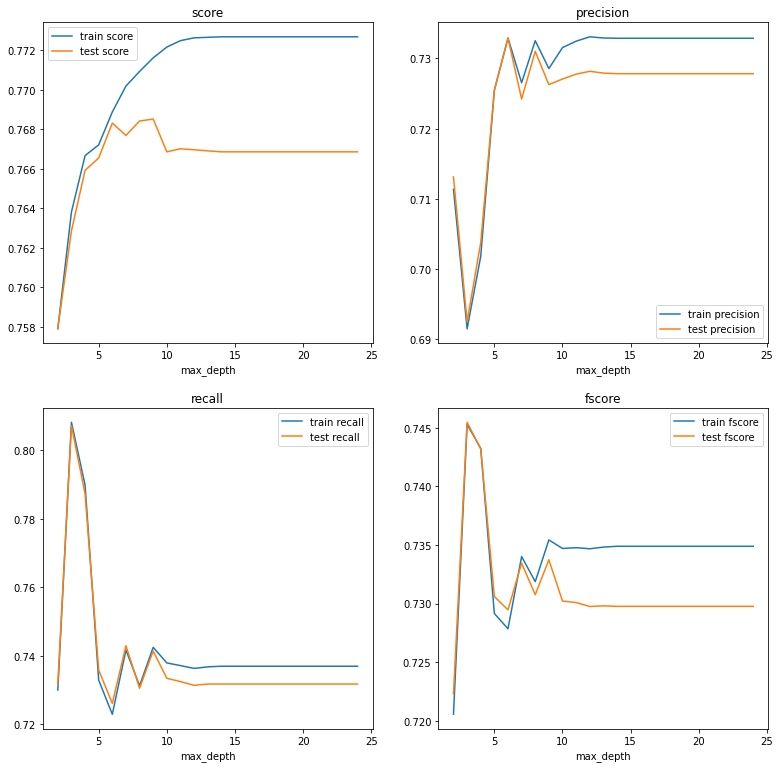

In [5]:
param_graphics(DecisionTreeClassifier, 'max_depth', range(2, 25))

### min_samples_leaf

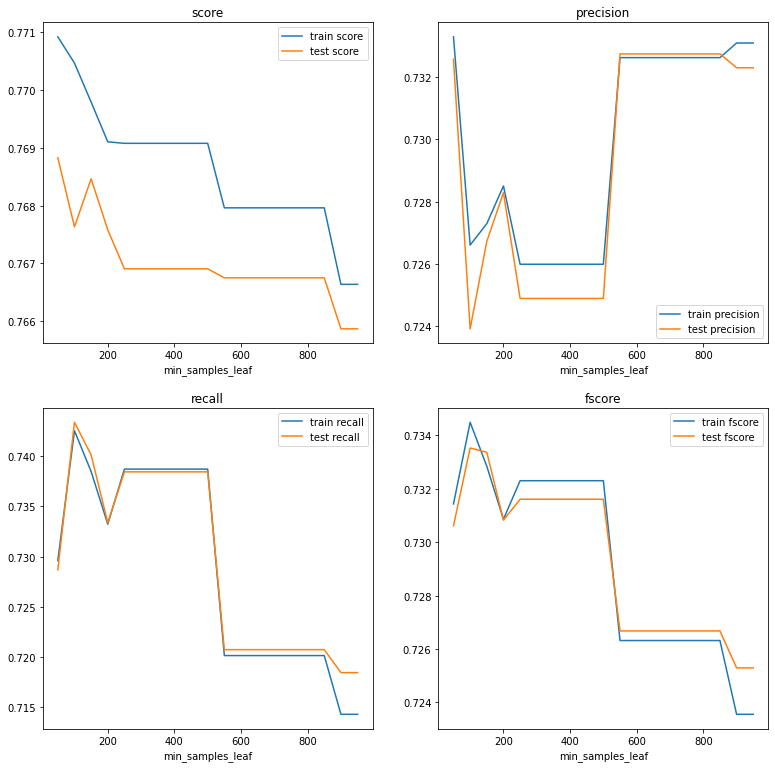

In [6]:
param_graphics(DecisionTreeClassifier, 'min_samples_leaf', range(50, 1000, 50))

### min_samples_split

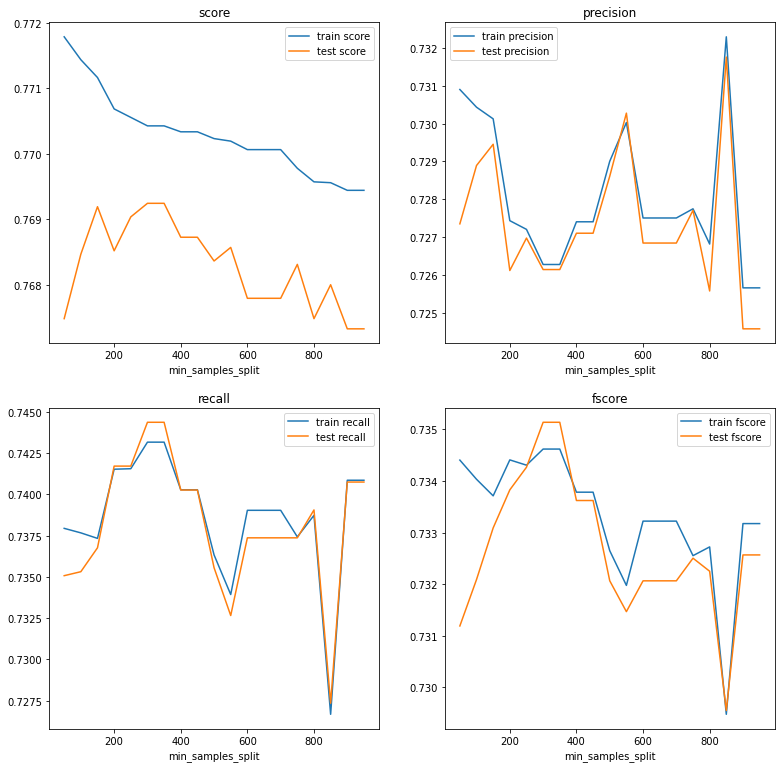

In [7]:
param_graphics(DecisionTreeClassifier, 'min_samples_split', range(50, 1000, 50))

## Linear SVC

### C

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


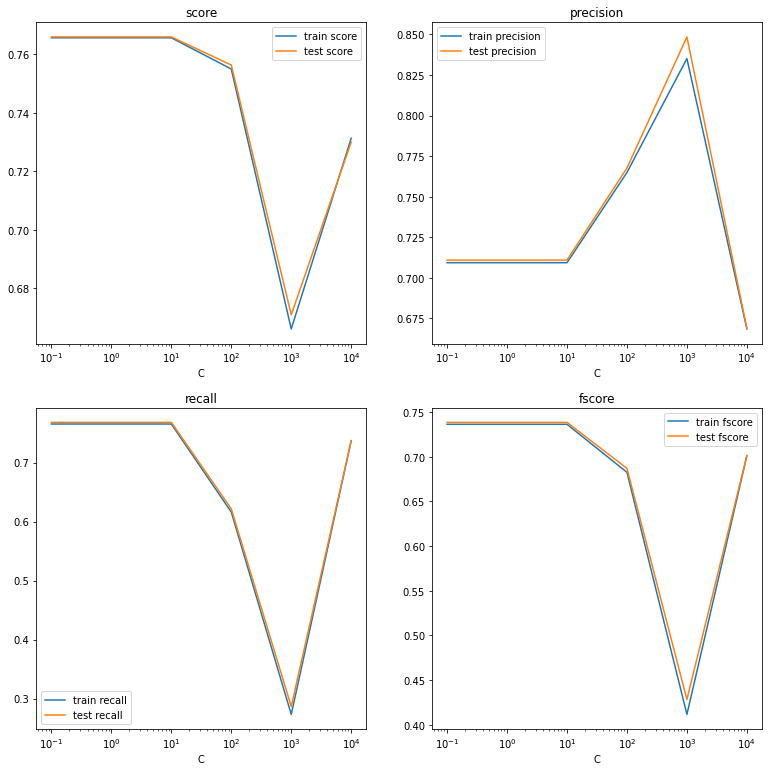

In [8]:
param_graphics(partial(LinearSVC, max_iter=10000), 'C', [10**x for x in range(-1, 5)], log=True)

## Random forest

### n_estimators

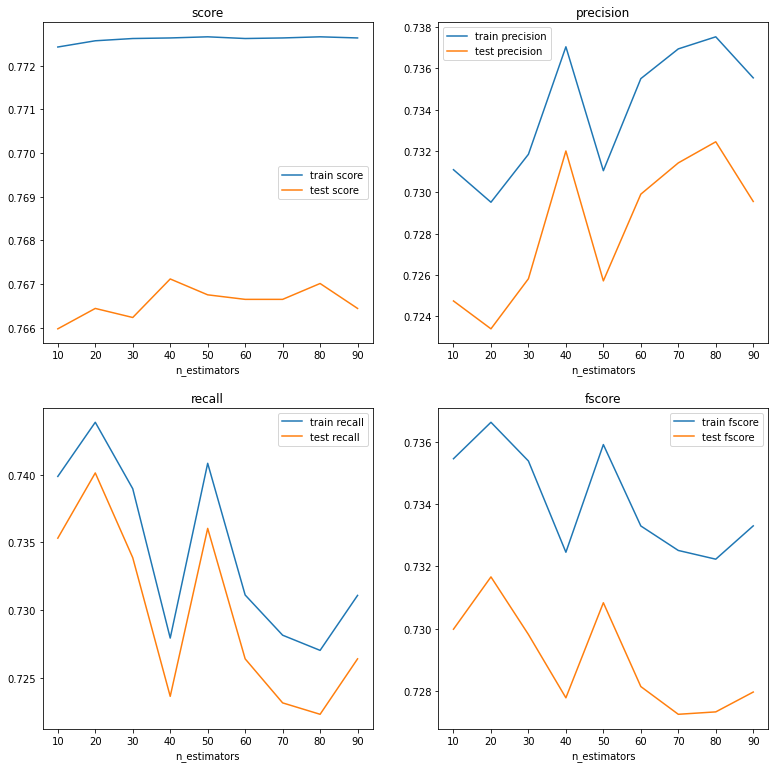

In [9]:
param_graphics(RandomForestClassifier, 'n_estimators', range(10, 100, 10))

### max_depth

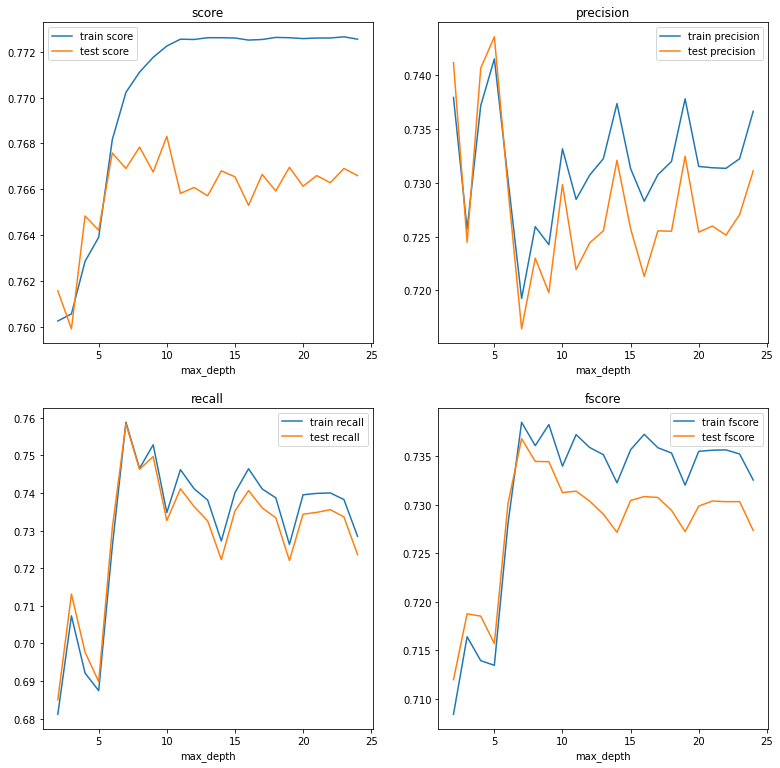

In [13]:
param_graphics(partial(RandomForestClassifier, n_estimators=20), 'max_depth', range(2, 25))

### min_samples_leaf

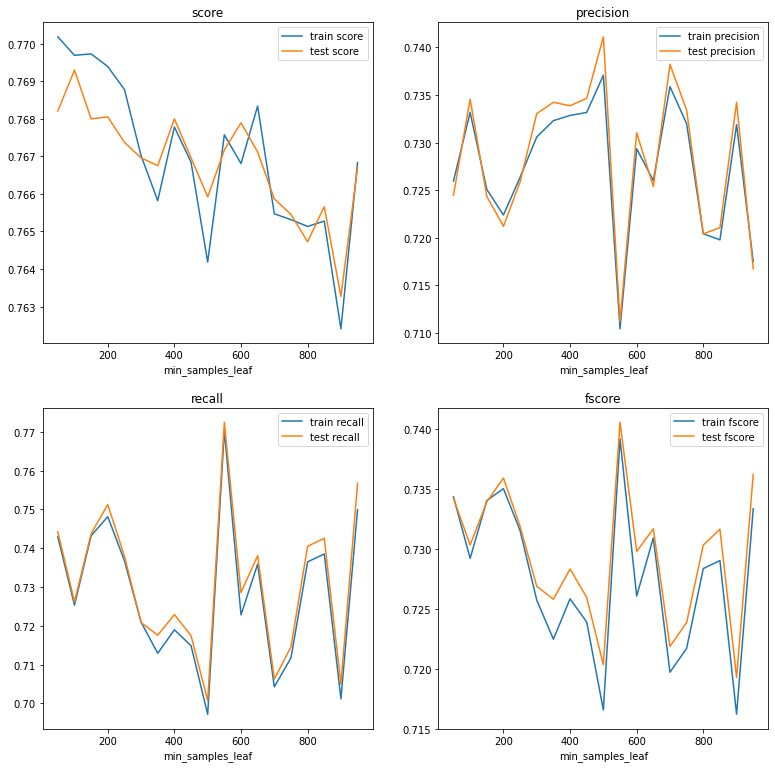

In [14]:
param_graphics(partial(RandomForestClassifier, n_estimators=20), 'min_samples_leaf', range(50, 1000, 50))

### min_samples_split

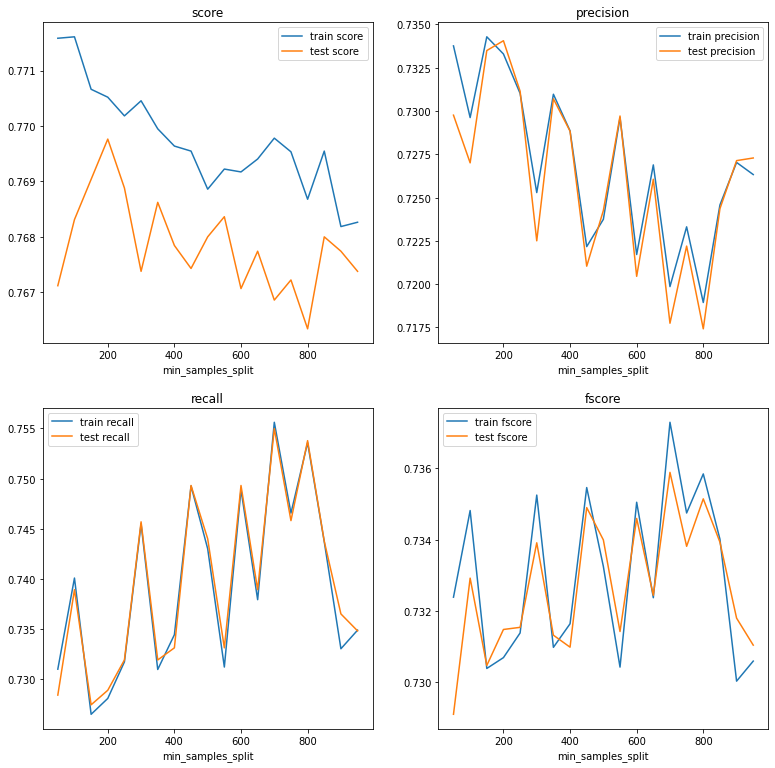

In [15]:
param_graphics(partial(RandomForestClassifier, n_estimators=20), 'min_samples_split', range(50, 1000, 50))

## k-neighbors classifier

### n_neighbors

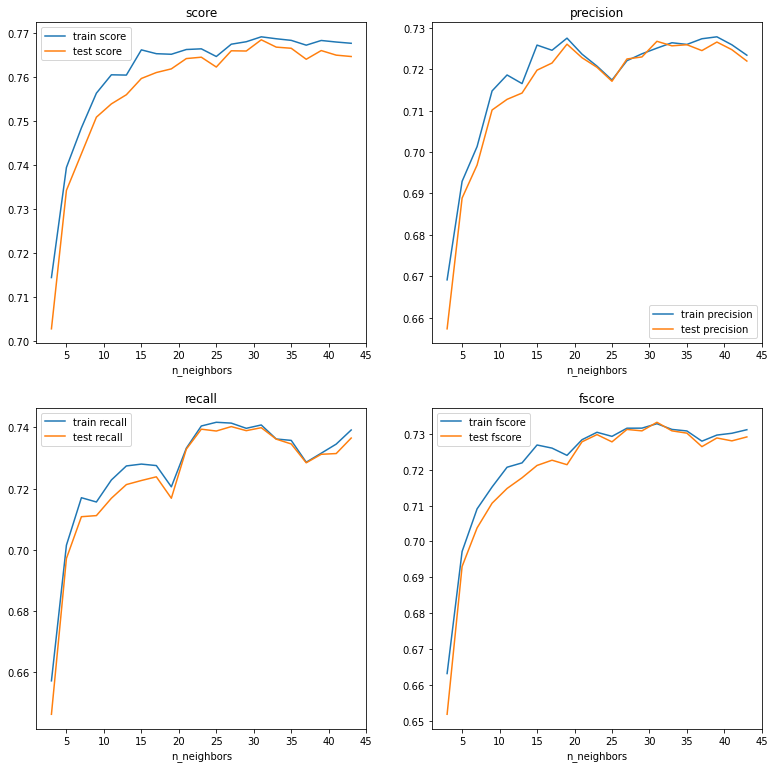

In [17]:
param_graphics(KNeighborsClassifier, 'n_neighbors', range(3, 45, 2))

### p

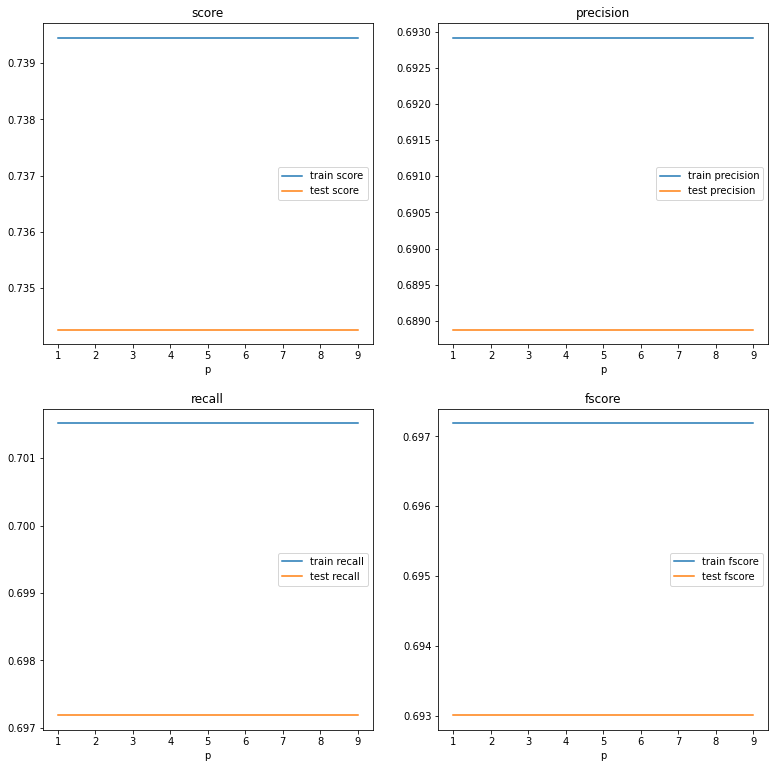

In [11]:
param_graphics(KNeighborsClassifier, 'p', range(1, 10))

## Logistic regression

### C

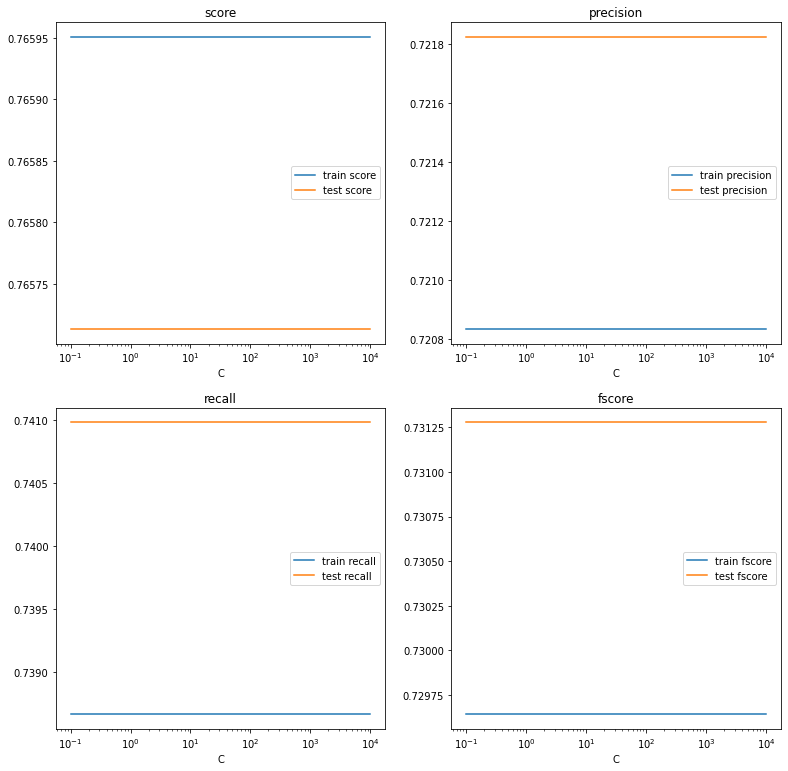

In [12]:
param_graphics(LogisticRegression, 'C', [10**x for x in range(-1, 5)], log=True)

# Fitting classifiers

## Basic classifiers

In [10]:
best_tree = GridSearchCV(DecisionTreeClassifier(),
                         {
    'max_depth': range(2, 11),
    'min_samples_leaf': range(40, 200, 20),
    'min_samples_split': range(200, 400, 20)
})

best_linear_svc = GridSearchCV(LinearSVC(max_iter=10000),
                               {
                                   'loss': ['hinge', 'squared_hinge']
})

best_random_forest = GridSearchCV(RandomForestClassifier(),
                                  [{
    'n_estimators': range(20, 45, 5),
                                      'min_samples_leaf': range(50, 200, 50),
                                      'min_samples_split': range(50, 200, 50)

},
    {
    'n_estimators': range(20, 45, 5),
                                      'min_samples_leaf': range(400, 650, 50),
                                      'min_samples_split': range(400, 650, 50)
}])
best_knn = GridSearchCV(KNeighborsClassifier(),
                       {
                           'n_neighbors': range(25, 40, 2),
                           'weights': ['uniform', 'distance']
                       })
best_log_reg = GridSearchCV(LogisticRegression(max_iter=10000),
                           {
                            'penalty': ['l1', 'l2', 'elasticnet']  
                           })
best_clfs = [best_tree, best_linear_svc, best_random_forest, best_knn, best_log_reg]
names = ['best_tree', 'best_linear_svc', 'best_random_forest', 'best_knn', 'best_log_reg']

In [11]:
for i, best_clf in enumerate(best_clfs):
    start = time.time()
    best_clf.fit(X_train, y_train)
    print('%s: %s' % (names[i], time.time() - start))

best_tree: 664.0434670448303
best_linear_svc: 447.5986888408661
best_random_forest: 2198.052389860153
best_knn: 1340.6012728214264


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator

best_log_reg: 3.6659138202667236


In [12]:
scores = {}
for i, best_clf in enumerate(best_clfs):
    scores[names[i]] = []
    scores[names[i]].append(best_clf.score(X_test, y_test))
    predicted_test = best_clf.predict(X_test)
    scores[names[i]].append(precision_score(y_test, predicted_test))
    scores[names[i]].append(recall_score(y_test, predicted_test))
    scores[names[i]].append(f1_score(y_test, predicted_test))

In [17]:
best_clfs[4].best_estimator_

LogisticRegression(max_iter=10000)

In [22]:
results = pd.DataFrame(scores.values(), index=names, columns=['score', 'precision', 'recall', 'f1_score'])

In [26]:
results.sort_values(by='score')

,score,precision,recall,f1_score
best_knn,0.764001,0.724502,0.728435,0.726463
best_log_reg,0.765713,0.721824,0.740982,0.731278
best_linear_svc,0.765869,0.710920,0.768126,0.738417
best_tree,0.767478,0.723297,0.744239,0.733619
best_random_forest,0.768205,0.725280,0.742430,0.733755


## Ensembles

### Stacking

In [7]:
from stacking import StackingEnsemble
from sklearn.linear_model import SGDClassifier
from useful_things import all_info, all_scores

In [15]:
stacking = StackingEnsemble([
    [RandomForestClassifier(n_estimators=30, max_depth=i) for i in range(5, 15)],
    [KNeighborsClassifier(n_neighbors=i) for i in range(5, 55, 5)],
    [SGDClassifier()]])

In [16]:
stacking.fit(X_train, y_train)

In [17]:
predicted = stacking.predict(X_test)

In [18]:
all_scores(y_test, predicted)

{'accuracy': 0.7674780713136451,
 'precision': 0.763255344496262,
 'recall': 0.7661390515926951,
 'f1': 0.7642776641643159}

In [20]:
other_stacking = StackingEnsemble([
    [RandomForestClassifier(n_estimators=30, max_depth=i) for i in range(5, 15)],
    [KNeighborsClassifier(n_neighbors=i) for i in range(5, 55, 5)],
    [RandomForestClassifier(n_estimators=30, max_depth=i) for i in range(5, 15)],
    [SGDClassifier()]])

In [21]:
other_stacking.fit(X_train, y_train)

In [22]:
other_predicted = other_stacking.predict(X_test)

In [23]:
all_scores(y_test, other_predicted)

{'accuracy': 0.7676856801785437,
 'precision': 0.7631167920375914,
 'recall': 0.7646220780322861,
 'f1': 0.7637750145007073}

### Boosting

In [8]:
from sklearn.ensemble import GradientBoostingClassifier

In [51]:
gs_gradient_boosting = GridSearchCV(GradientBoostingClassifier(n_estimators=200, warm_start=True, n_iter_no_change=20),
                                param_grid={
                                    'max_depth': range(2, 6),
                                    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1]
                                })

In [52]:
gs_gradient_boosting.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(n_estimators=200,
                                                  n_iter_no_change=20,
                                                  warm_start=True),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
                         'max_depth': range(2, 6)})

In [53]:
best_gradient_boosting = gs_gradient_boosting.best_estimator_

In [56]:
best_gradient_boosting

GradientBoostingClassifier(max_depth=4, n_estimators=200, n_iter_no_change=20,
                           warm_start=True)

In [54]:
all_info(best_gradient_boosting, X_test, y_test)

{'macro': {'accuracy': 0.7683604089894639,
  'precision': 0.763925571922377,
  'recall': 0.7661302380806536,
  'f1': 0.7648077110829599},
 'micro': {'accuracy': 0.7683604089894639,
  'precision': 0.7683604089894639,
  'recall': 0.7683604089894639,
  'f1': 0.7683604089894639}}

In [55]:
list(best_gradient_boosting.feature_importances_)

[0.7369766921272911,
 0.005342375267369743,
 0.02783437487063766,
 0.06907476837900477,
 0.0022043728426267444,
 0.07173519556827555,
 0.013211424148790753,
 0.07362079679600378]

In [20]:
X_train.head()

,Sex,Age,Fare,C,Q,S,Relatives,Pclass
29486,1.0,1.0,2.0,0.0,0.0,1.0,0.0,1
70020,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3
89661,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1
53938,0.0,0.0,4.0,1.0,0.0,0.0,0.0,1
70517,0.0,2.0,3.0,0.0,0.0,1.0,1.0,1


In [28]:
clf = GradientBoostingClassifier(n_estimators=200, warm_start=True)

In [29]:
clf.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=200, warm_start=True)

In [30]:
staged_scores = pd.DataFrame([all_scores(y_test, predicted) for predicted in clf.staged_predict(X_test)])

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'f1')

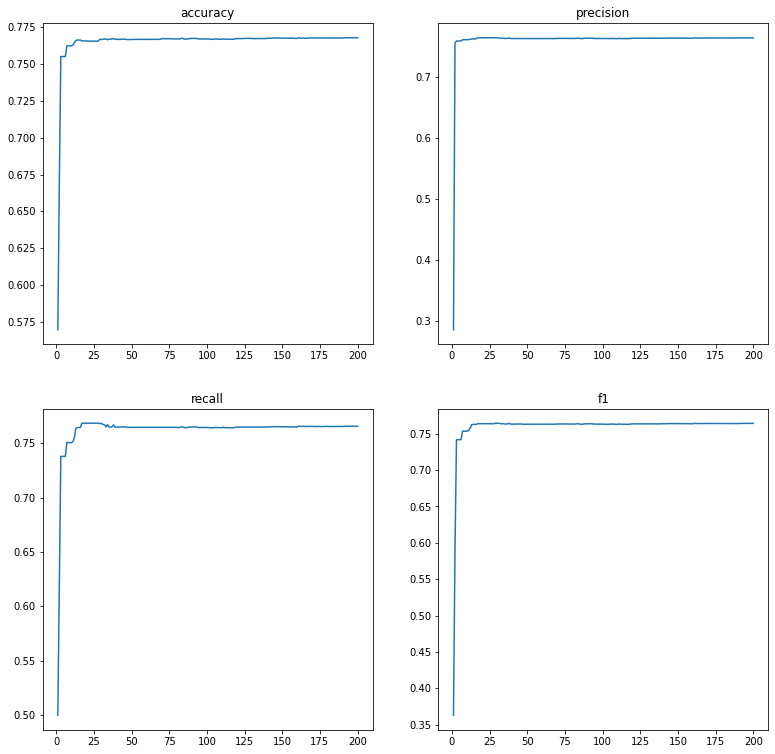

In [39]:
fig, axes = plt.subplots(2, 2, figsize=(13, 13))

axes[0][0].plot(range(1, 201), staged_scores.accuracy)
axes[0][0].set_title('accuracy')

axes[0][1].plot(range(1, 201), staged_scores.precision)
axes[0][1].set_title('precision')

axes[1][0].plot(range(1, 201), staged_scores.recall)
axes[1][0].set_title('recall')

axes[1][1].plot(range(1, 201), staged_scores.f1)
axes[1][1].set_title('f1')

In [44]:
for col in staged_scores.columns:
    print(f'{col}: {staged_scores[col].argmax()}  {staged_scores[col].max()}')

accuracy: 191  0.7677375823947683
precision: 28  0.763623491527817
recall: 21  0.7683952007811453
f1: 28  0.7644937735125167


### Voting

In [9]:
from sklearn.ensemble import VotingClassifier

In [10]:
voting = VotingClassifier([(f'forest_{i}', RandomForestClassifier(n_estimators=i)) for i in range(30, 50, 2)] +\
                         [(f'knn_{i}', KNeighborsClassifier(n_neighbors=i)) for i in range(25, 35)] +\
                         [(f'tree_{i}', DecisionTreeClassifier(max_depth=i)) for i in range(5, 10)])

In [11]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('forest_30',
                              RandomForestClassifier(n_estimators=30)),
                             ('forest_32',
                              RandomForestClassifier(n_estimators=32)),
                             ('forest_34',
                              RandomForestClassifier(n_estimators=34)),
                             ('forest_36',
                              RandomForestClassifier(n_estimators=36)),
                             ('forest_38',
                              RandomForestClassifier(n_estimators=38)),
                             ('forest_40',
                              RandomForestClassifier(n_estimators=40...
                             ('knn_32', KNeighborsClassifier(n_neighbors=32)),
                             ('knn_33', KNeighborsClassifier(n_neighbors=33)),
                             ('knn_34', KNeighborsClassifier(n_neighbors=34)),
                             ('tree_5', DecisionTreeClassifier(max_depth=

In [12]:
all_info(voting, X_test, y_test)

{'macro': {'accuracy': 0.7687756267192609,
  'precision': 0.764237197207615,
  'recall': 0.7635690996157858,
  'f1': 0.7638882495236576},
 'micro': {'accuracy': 0.7687756267192609,
  'precision': 0.7687756267192609,
  'recall': 0.7687756267192609,
  'f1': 0.7687756267192609}}

In [13]:
df_test = pd.read_csv('my_data/test.csv')

In [14]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,100000,3,"Holliday, Daniel",male,19.0,0,0,24745,63.01,NaN,S
1,100001,3,"Nguyen, Lorraine",female,53.0,0,0,13264,5.81,NaN,S
2,100002,1,"Harris, Heather",female,19.0,0,0,25990,38.91,B15315,C
3,100003,2,"Larsen, Eric",male,25.0,0,0,314011,12.93,NaN,S
4,100004,1,"Cleary, Sarah",female,17.0,0,2,26203,26.89,B22515,C
...,...,...,...,...,...,...,...,...,...,...,...
99995,199995,3,"Cash, Cheryle",female,27.0,0,0,7686,10.12,NaN,Q
99996,199996,1,"Brown, Howard",male,59.0,1,0,13004,68.31,NaN,S
99997,199997,3,"Lightfoot, Cameron",male,47.0,0,0,4383317,10.87,NaN,S
99998,199998,1,"Jacobsen, Margaret",female,49.0,1,2,PC 26988,29.68,B20828,C


In [17]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, KBinsDiscretizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
class TestTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.tr = ColumnTransformer([('sex_encoding', OrdinalEncoder(categories=[['male', 'female']]), ['Sex']),
                                     ('age_encoding', Pipeline([('a', SimpleImputer(strategy='median')),
                                                               ('b', KBinsDiscretizer(n_bins=5, encode='ordinal'))]), ['Age', 'Fare']),
                                     ('embarked_encoding', Pipeline([('c', SimpleImputer(strategy='most_frequent')),
                                                                    ('d', OneHotEncoder(categories=[['C', 'Q', 'S']]))]), ['Embarked'])
                                     ])
    def drop_unimportant_features(self, X):
        return X.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
    def fit(self, X):
        self.tr.fit(self.drop_unimportant_features(X).dropna())
        return self
    def transform(self, X):
        X_full = self.drop_unimportant_features(X)
        X_transformed = pd.DataFrame(data=self.tr.transform(X_full), columns=['Sex', 'Age', 'Fare', 'C', 'Q', 'S'])
        X_transformed['Relatives'] = KBinsDiscretizer(n_bins=3, encode='ordinal').fit_transform(np.reshape(list(X_full['SibSp'] + X_full['Parch']), (-1, 1)))
        if 'Survived' in X_full.columns:
            X_transformed['Survived'] = X_full['Survived'].to_numpy()
        X_transformed['Pclass'] = X_full['Pclass'].to_numpy()
        return X_transformed

In [18]:
transformer = TestTransformer()

In [21]:
transformer.fit(pd.read_csv('my_data/train.csv'))

TestTransformer()

In [22]:
df_test.insert(loc=1, column='Survived', value=1)
transformed_df_test = transformer.transform(df_test)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_discretization.py:220: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn('Bins whose width are too small (i.e., <= '


In [24]:
transformed_df_test.drop('Survived', axis=1, inplace=True)

In [25]:
predicted = voting.predict(transformed_df_test)

In [33]:
predicted = pd.DataFrame({'PassengerId': range(100000, 200000), 'Survived': predicted.Survived})

In [34]:
predicted.head()

,PassengerId,Survived
100000,100000,0
100001,100001,1
100002,100002,1
100003,100003,0
100004,100004,1


In [36]:
predicted.to_csv('prediction_final.csv', index=None)